# Assignment 2 (Probability Theory)



1. Go through the titanic dataset and either use Python or Excel to find the following:

Probability that a passenger dies (Marginal probability)

Probability that a passenger was male and survived (Joint probability of independent events)

Probability that a passenger survived given that she was a female (Conditional/Joint probability of dependent events)


In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')

# Marginal probability: P(Died)
p_died = len(df[df['survived'] == 0]) / len(df)
print(f"P(Died): {p_died:.4f}")

# Joint probability: P(Male AND Survived)
male_survived = len(df[(df['gender'] == 'male') & (df['survived'] == 1)])
p_male_survived = male_survived / len(df)
print(f"P(Male and Survived): {p_male_survived:.4f}")

# Conditional probability: P(Survived | Female)
females = df[df['gender'] == 'female']
p_survived_given_female = len(females[females['survived'] == 1]) / len(females)
print(f"P(Survived | Female): {p_survived_given_female:.4f}")

P(Died): 0.6162
P(Male and Survived): 0.1223
P(Survived | Female): 0.7420


2. For the nobel dataset, find:
(a) Probability of winning a Nobel Prize in Physics given the laureate is female
(b) Probability of winning a Nobel Prize in Literature given the laureate was born in the USA


In [2]:
import pandas as pd

df = pd.read_csv('nobel.csv')

# (a) P(Physics | Female)
females = df[df['gender'] == 'female']
p_physics_given_female = len(females[females['category'] == 'Physics']) / len(females)
print(f"(a) P(Physics | Female): {p_physics_given_female:.4f}")

# (b) P(Literature | Born in USA)
usa_born = df[df['birth_country'] == 'USA']
p_lit_given_usa = len(usa_born[usa_born['category'] == 'Literature']) / len(usa_born)
print(f"(b) P(Literature | Born in USA): {p_lit_given_usa:.4f}")

(a) P(Physics | Female): 0.0556
(b) P(Literature | Born in USA): 0.0328


3. Combine datasets:
Men ODI Team Match Results - 20th Century.csv
Men ODI Team Match Results - 21st Century.csv

Find the historical win rate of India.
Now India is scheduled to play 60 ODI matches over the next 3 years.

(a) What is the probability that India wins exactly 35 out of these 60 matches?

(b) What is the probability that India wins more than 40 matches?

(c) What is the probability that India wins at least 45 matches?

(d) What is the most likely number of wins India will have in 60 matches?



In [3]:
import pandas as pd
import scipy.stats as stats
import math

# Load and combine data
df1 = pd.read_csv('Men ODI Team Match Results - 20th Century.csv')
df2 = pd.read_csv('Men ODI Team Match Results - 21st Century.csv')
df = pd.concat([df1, df2])

# Calculate Historical Win Rate for India
india_matches = df[df['Country'] == 'India']
wins = len(india_matches[india_matches['Result'] == 'Won'])
p_win = wins / len(india_matches)
print(f"Historical Win Rate (India): {p_win:.4f}")

n = 60

# (a) P(Wins = 35)
print(f"(a) P(X=35): {stats.binom.pmf(k=35, n=n, p=p_win):.4f}")

# (b) P(Wins > 40) -> Survival Function at 40
print(f"(b) P(X>40): {stats.binom.sf(k=40, n=n, p=p_win):.4f}")

# (c) P(Wins >= 45) -> Survival Function at 44
print(f"(c) P(X>=45): {stats.binom.sf(k=44, n=n, p=p_win):.4f}")

# (d) Most likely number of wins
print(f"(d) Most likely wins: {math.floor((n + 1) * p_win)}")

Historical Win Rate (India): 0.5000
(a) P(X=35): 0.0450
(b) P(X>40): 0.0031
(c) P(X>=45): 0.0001
(d) Most likely wins: 30


4. Calculate Z-scores and do outlier analysis on 

(a) Glucose column of Diabetes dataset

(b) Billionaiers dataset.


In [4]:
import pandas as pd
import numpy as np
from scipy import stats

def check_outliers(df, col, name):
    data = df[col].dropna()
    z_scores = np.abs(stats.zscore(data))
    outliers = data[z_scores > 3]
    print(f"--- {name} ({col}) ---")
    print(f"Outliers found: {len(outliers)}")
    print(f"Sample values: {outliers.head().values}\n")

# (a) Diabetes
df_dia = pd.read_csv('diabetes.csv')
check_outliers(df_dia, 'Glucose', 'Diabetes')

# (b) Billionaires
df_bil = pd.read_csv('billionaires.csv')
check_outliers(df_bil, 'finalWorth', 'Billionaires')

--- Diabetes (Glucose) ---
Outliers found: 5
Sample values: [0 0 0 0 0]

--- Billionaires (finalWorth) ---
Outliers found: 37
Sample values: [211000 180000 114000 107000 106000]



5. For billionaires dataset and titanic age column, first run shapiro test and qq-plot. Then try CLT on both and see if now we see normal distribution for their sample means.

--- Billionaires Net Worth ---
Shapiro P-value: 4.9542e-72


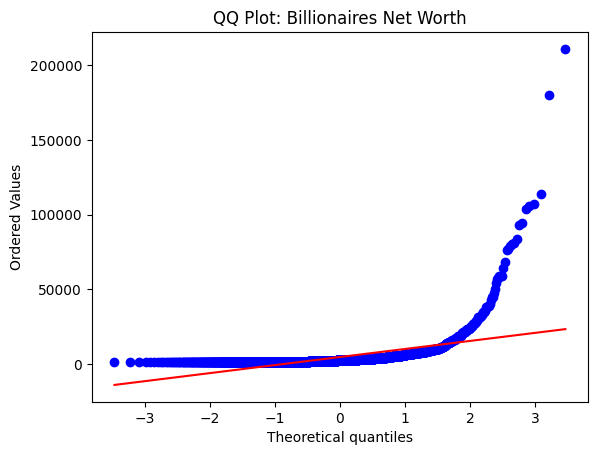

CLT Sample Means Shapiro P-value: 0.0000


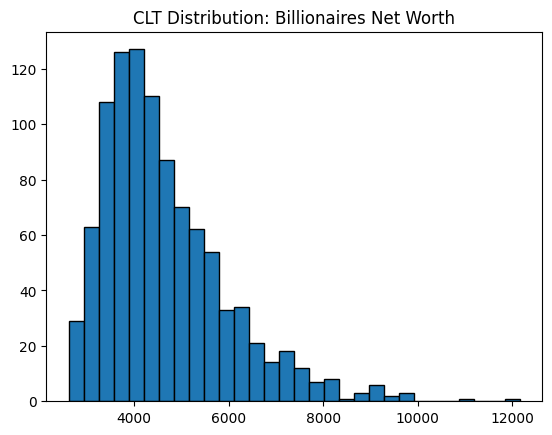

--- Titanic Age ---
Shapiro P-value: 7.3373e-08


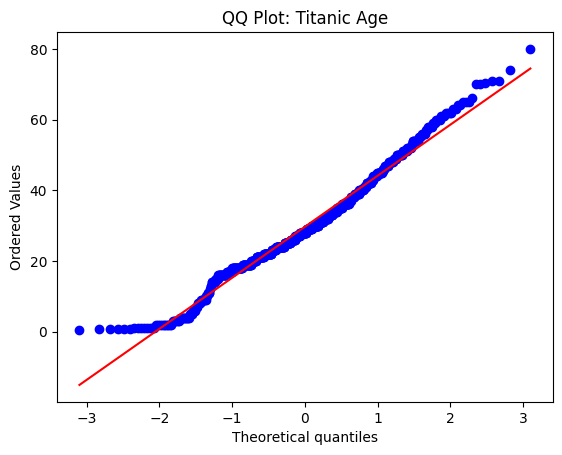

CLT Sample Means Shapiro P-value: 0.7121


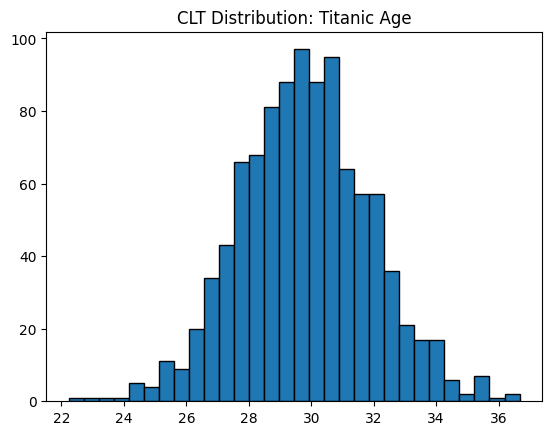

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def analyze_normality(data, title):
    data = data.dropna()
    
    # Shapiro-Wilk & QQ Plot
    print(f"--- {title} ---")
    print(f"Shapiro P-value: {stats.shapiro(data)[1]:.4e}")
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ Plot: {title}")
    plt.show()
    
    # CLT: Sampling Distribution of Means
    sample_means = [np.mean(np.random.choice(data, 50)) for _ in range(1000)]
    print(f"CLT Sample Means Shapiro P-value: {stats.shapiro(sample_means)[1]:.4f}")
    plt.hist(sample_means, bins=30, edgecolor='black')
    plt.title(f"CLT Distribution: {title}")
    plt.show()

# Run for Billionaires and Titanic
df_bil = pd.read_csv('billionaires.csv')
analyze_normality(df_bil['finalWorth'], 'Billionaires Net Worth')

df_tit = pd.read_csv('titanic.csv')
analyze_normality(df_tit['age'], 'Titanic Age')

6. It is estimated that the average marks obtained by students in some entrance exam are 76 out of 100. To evaluate this claim, we take a sample of 100 students and find that the average marks are 78 with a standard deviation of 2.

(a) State your null and alternate hypothesis.

(b) Decide alpha value.

(c) Calculate test statistic.

(d) Compare the test statistic with critical value.

(e) Compare your p-value (Use z-table or z-calculator) with alpha.

(f) State your conclusion.


In [6]:
from scipy.stats import norm
import math

mu0, n, x_bar, sigma = 76, 100, 78, 2
alpha = 0.05

z_stat = (x_bar - mu0) / (sigma / math.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print("Reject H0" if p_value < alpha else "Fail to Reject H0")

Z-statistic: 10.0000
P-value: 0.000000
Reject H0


7.(a) A pharma company has manufactured a new medicine and claims that the average effectiveness of the medicine can be seen in 8 weeks. We study this for 25 patients and find that this effectiveness is seen in 8.5 weeks with a standard deviation of 0.25 weeks. Do the same steps as above and draw conclusions, for alpha = 0.01, 0.05, and 0.1 separately.

(b) For the same case above, another study shows average effectiveness in 7.5 weeks for a different set of 25 patients with a standard deviation of 0.25 weeks. What will be our conclusion?


In [7]:
from scipy.stats import t
import math

def t_test_one_sample(n, x_bar, s, mu0, alphas):
    t_stat = (x_bar - mu0) / (s / math.sqrt(n))
    df = n - 1
    p_val = 2 * (1 - t.cdf(abs(t_stat), df))
    
    print(f"Mean: {x_bar}, T-Stat: {t_stat:.4f}, P-Val: {p_val:.6f}")
    for alpha in alphas:
        print(f"  Alpha {alpha}: {'Reject H0' if p_val < alpha else 'Fail to Reject'}")

# (a) & (b)
t_test_one_sample(25, 8.5, 0.25, 8, [0.01, 0.05, 0.1])
t_test_one_sample(25, 7.5, 0.25, 8, [0.01, 0.05, 0.1])

Mean: 8.5, T-Stat: 10.0000, P-Val: 0.000000
  Alpha 0.01: Reject H0
  Alpha 0.05: Reject H0
  Alpha 0.1: Reject H0
Mean: 7.5, T-Stat: -10.0000, P-Val: 0.000000
  Alpha 0.01: Reject H0
  Alpha 0.05: Reject H0
  Alpha 0.1: Reject H0


8. A courier company delivers parcels in a particular area in 30 minutes. A new GPS system installed has reduced the average time to 28 minutes, when 100 trucks were studied, with a sample standard deviation of 4.2 minutes. Run a two-tailed test and a one-tailed (left-tailed) test.

In [8]:
from scipy.stats import norm
import math

mu0, n, x_bar, s = 30, 100, 28, 4.2
alpha = 0.05

z_stat = (x_bar - mu0) / (s / math.sqrt(n))

# Two-tailed
p_two = 2 * (1 - norm.cdf(abs(z_stat)))
print(f"Two-tailed P-value: {p_two:.6f} -> {'Reject H0' if p_two < alpha else 'Fail to Reject'}")

# Left-tailed (Reduced time)
p_left = norm.cdf(z_stat)
print(f"Left-tailed P-value: {p_left:.6f} -> {'Reject H0' if p_left < alpha else 'Fail to Reject'}")

Two-tailed P-value: 0.000002 -> Reject H0
Left-tailed P-value: 0.000001 -> Reject H0


9. A battery manufacturer claims that a battery which used run for 30 hours now runs for more than 30 hours due to new technology. 200 batteries were studied. Average battery time was found to be 29.5 hours with a standard deviation of 8 hours. Run a one-tailed (right-tailed) test.

In [9]:
from scipy.stats import norm
import math

mu0, n, x_bar, s = 30, 200, 29.5, 8
alpha = 0.05

z_stat = (x_bar - mu0) / (s / math.sqrt(n))

# Right-tailed (More than 30)
p_right = 1 - norm.cdf(z_stat)
print(f"Right-tailed P-value: {p_right:.6f} -> {'Reject H0' if p_right < alpha else 'Fail to Reject'}")

Right-tailed P-value: 0.811620 -> Fail to Reject


10. For the three combined Marathon datasets, extract the top 25 records with lowest finish time (Official Time column). Check the null hypothesis H0 = The average finishing time of the top 25 athletes is 130 minutes. Test it for α = 1%, 5%, and 10%.

In [10]:
import pandas as pd
from scipy import stats

# Load and combine
files = ['marathon_results_2015.csv', 'marathon_results_2016.csv', 'marathon_results_2017.csv']
df = pd.concat([pd.read_csv(f) for f in files])

# Convert 'Official Time' (H:M:S) to Minutes
def time_to_min(t):
    parts = list(map(int, t.split(':')))
    return parts[0]*60 + parts[1] + parts[2]/60

df['Minutes'] = df['Official Time'].apply(time_to_min)

# Top 25 lowest times
top_25 = df.nsmallest(25, 'Minutes')['Minutes']

# Test H0: mu = 130
t_stat, p_val = stats.ttest_1samp(top_25, 130)

print(f"Mean time: {top_25.mean():.2f} min")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.6f}")

for alpha in [0.01, 0.05, 0.1]:
    print(f"Alpha {alpha}: {'Reject H0' if p_val < alpha else 'Fail to Reject'}")

Mean time: 132.24 min
T-statistic: 6.4194, P-value: 0.000001
Alpha 0.01: Reject H0
Alpha 0.05: Reject H0
Alpha 0.1: Reject H0
